In [53]:
!pip install opencv-python-headless

In [54]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import splitfolders
input_folder = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output"
splitfolders.ratio (input_folder, output="C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\splitted_gray_data_70_30",
                seed=42, ratio=(.7,.3),
                group_prefix=None)

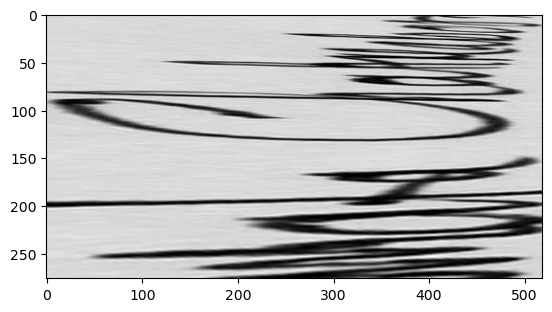

In [3]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_70_30//train//subject_1//signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [4]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_70_30//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_70_30//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [57]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_70_30//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_70_30//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1401 images belonging to 16 classes.
Found 766 images belonging to 16 classes.


In [58]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
44/44 [==============================] - 170s 2s/step - loss: 2.7966 - accuracy: 0.0614 - val_loss: 2.7670 - val_accuracy: 0.0783
Epoch 2/25
44/44 [==============================] - 82s 2s/step - loss: 2.7699 - accuracy: 0.0807 - val_loss: 2.7766 - val_accuracy: 0.0731
Epoch 3/25
44/44 [==============================] - 71s 2s/step - loss: 2.7656 - accuracy: 0.0785 - val_loss: 2.7681 - val_accuracy: 0.0705
Epoch 4/25
44/44 [==============================] - 69s 2s/step - loss: 2.7667 - accuracy: 0.0685 - val_loss: 2.7573 - val_accuracy: 0.0653
Epoch 5/25
44/44 [==============================] - 71s 2s/step - loss: 2.7546 - accuracy: 0.0749 - val_loss: 2.7542 - val_accuracy: 0.0862
Epoch 6/25
44/44 [==============================] - 75s 2s/step - loss: 2.7452 - accuracy: 0.0885 - val_loss: 2.7581 - val_accuracy: 0.0888
Epoch 7/25
44/44 [==============================] - 81s 2s/step - loss: 2.7347 - accuracy: 0.0942 - val_loss: 2.7518 - val_accuracy: 0.0757
Epoch 8/25
44/44 [=

In [60]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 17s 595ms/step - loss: 2.5236 - accuracy: 0.1358
Test Loss: 2.523566961288452
Test Accuracy: 0.13577023148536682
24/24 [==============================] - 32s 583ms/step


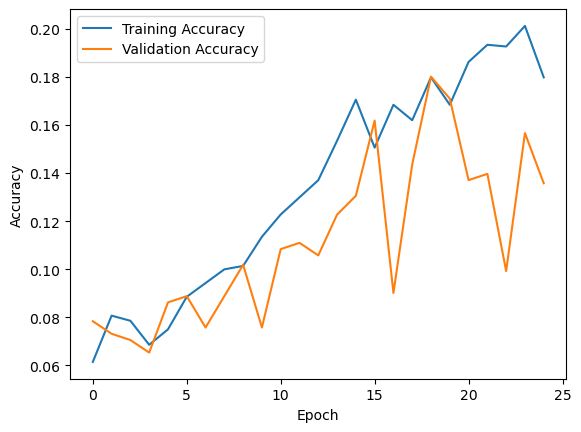

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

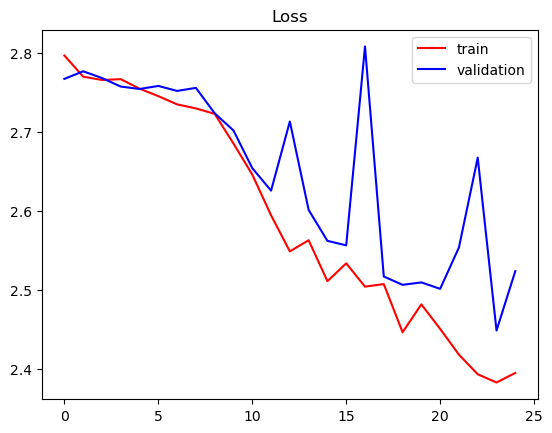

In [62]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [63]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 17s 614ms/step
Confusion Matrix:
[[ 3  5  0 15  7  0  3  2  0  0  1  7  0  8  0  2]
 [ 2  8  1 19  0  1  1  1  0  1  0  3  0 16  1  0]
 [ 4 12  1  8  3  0  3  2  0  0  0 13  0  4  2  3]
 [ 0  2  0 32  0  0  0  1  0  0  0  0  0  2  0  0]
 [ 1  7  0  4 18  1  7  1  0  1  0  8  0  4  1  1]
 [ 3  4  0 33  0  0  0  1  0  0  0  4  0  3  1  1]
 [ 2  2  0  0 30  0 10  0  2  0  1  5  0  0  1  0]
 [ 0  2  0 30  1  0  1  2  0  0  0  5  0 11  0  1]
 [ 0  2  0  0 13  0 11  0  3  0  0  3  0  0  1  4]
 [ 1  5  1  5  2  1  5  1  0  1  1  6  0  5  0  0]
 [ 2  4  0  7  6  0  0  0  0  0  0  3  0  8  1  0]
 [ 3  6  1 17  6  1  0  2  0  1  0  8  0  9  0  2]
 [ 2 10  0  1 20  0  6  1  0  0  0  7  0  0  1  3]
 [ 0  2  0 28  1  0  0  5  0  0  1  1  0 11  0  0]
 [ 4  7  0  4  7  0  1  1  0  1  0 13  0  8  1  4]
 [ 6  2  0  6 11  0  4  1  0  0  0  8  0  1  3  6]]


24/24 [==============================] - 17s 603ms/step


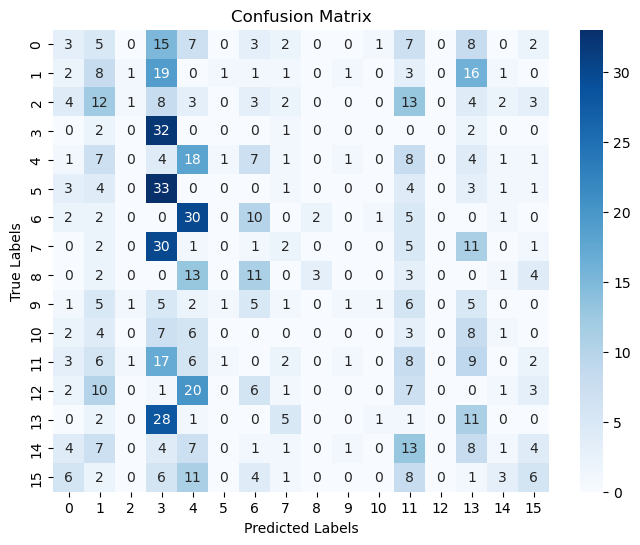

In [64]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0566, FPR = 0.0421, TNR = 0.9579, FNR = 0.9434
Class 1: TPR = 0.1481, FPR = 0.1011, TNR = 0.8989, FNR = 0.8519
Class 2: TPR = 0.0182, FPR = 0.0042, TNR = 0.9958, FNR = 0.9818
Class 3: TPR = 0.8649, FPR = 0.2428, TNR = 0.7572, FNR = 0.1351
Class 4: TPR = 0.3333, FPR = 0.1503, TNR = 0.8497, FNR = 0.6667
Class 5: TPR = 0.0000, FPR = 0.0056, TNR = 0.9944, FNR = 1.0000
Class 6: TPR = 0.1887, FPR = 0.0589, TNR = 0.9411, FNR = 0.8113
Class 7: TPR = 0.0377, FPR = 0.0266, TNR = 0.9734, FNR = 0.9623
Class 8: TPR = 0.0811, FPR = 0.0027, TNR = 0.9973, FNR = 0.9189
Class 9: TPR = 0.0294, FPR = 0.0055, TNR = 0.9945, FNR = 0.9706
Class 10: TPR = 0.0000, FPR = 0.0054, TNR = 0.9946, FNR = 1.0000
Class 11: TPR = 0.1429, FPR = 0.1211, TNR = 0.8789, FNR = 0.8571
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.2245, FPR = 0.1102, TNR = 0.8898, FNR = 0.7755
Class 14: TPR = 0.0196, FPR = 0.0168, TNR = 0.9832, FNR = 0.9804
Class 15: TPR = 0.1250, FPR = 0.029

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


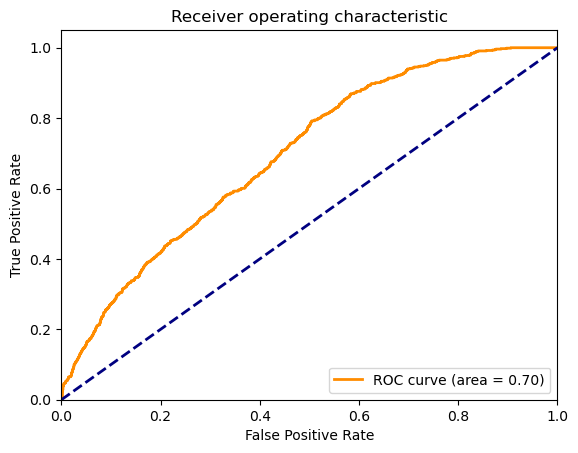

In [66]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 18s 619ms/step - loss: 2.5236 - accuracy: 0.1358
Test Loss: 2.523566961288452
Test Accuracy: 0.13577023148536682
24/24 [==============================] - 16s 578ms/step
AUC for class 0: 0.5559
AUC for class 1: 0.7349
AUC for class 2: 0.5421
AUC for class 3: 0.9282
AUC for class 4: 0.7058
AUC for class 5: 0.7499
AUC for class 6: 0.8282
AUC for class 7: 0.7729
AUC for class 8: 0.8991
AUC for class 9: 0.4935
AUC for class 10: 0.6003
AUC for class 11: 0.5851
AUC for class 12: 0.7373
AUC for class 13: 0.7910
AUC for class 14: 0.5457
AUC for class 15: 0.6875


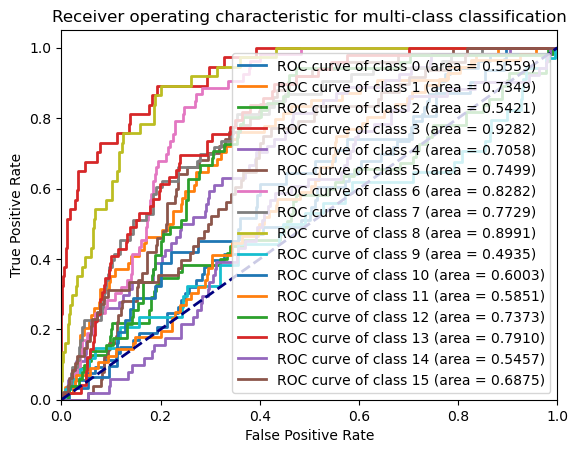

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 30 Epoch

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
44/44 [==============================] - 238s 4s/step - loss: 2.8024 - accuracy: 0.0678 - val_loss: 2.7657 - val_accuracy: 0.0809
Epoch 2/30
44/44 [==============================] - 81s 2s/step - loss: 2.7716 - accuracy: 0.0742 - val_loss: 2.7587 - val_accuracy: 0.0744
Epoch 3/30
44/44 [==============================] - 76s 2s/step - loss: 2.7638 - accuracy: 0.0814 - val_loss: 2.7684 - val_accuracy: 0.0744
Epoch 4/30
44/44 [==============================] - 73s 2s/step - loss: 2.7621 - accuracy: 0.0707 - val_loss: 2.7563 - val_accuracy: 0.0849
Epoch 5/30
44/44 [==============================] - 64s 1s/step - loss: 2.7543 - accuracy: 0.0942 - val_loss: 2.7506 - val_accuracy: 0.0901
Epoch 6/30
44/44 [==============================] - 67s 2s/step - loss: 2.7552 - accuracy: 0.0792 - val_loss: 2.7575 - val_accuracy: 0.0731
Epoch 7/30
44/44 [==============================] - 81s 2s/step - loss: 2.7515 - accuracy: 0.0849 - val_loss: 2.7521 - val_accuracy: 0.0757
Epoch 8/30
44/44 [=

In [69]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 14s 533ms/step - loss: 2.4765 - accuracy: 0.1423
Test Loss: 2.4765214920043945
Test Accuracy: 0.1422976553440094
24/24 [==============================] - 52s 486ms/step


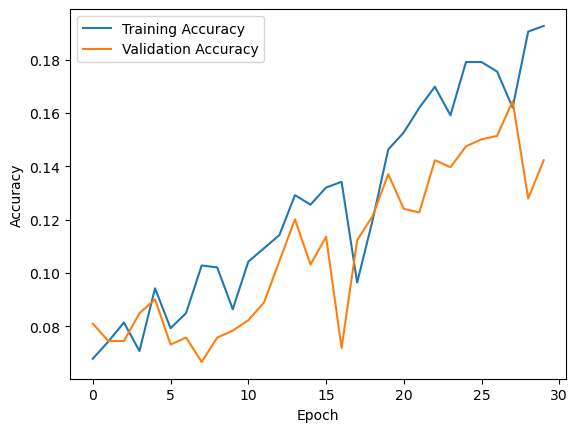

In [70]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

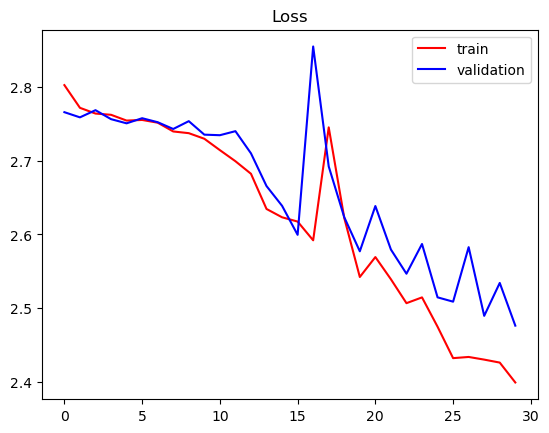

In [71]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [72]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 13s 493ms/step
Confusion Matrix:
[[12  3  1  0  0  2  4 22  0  0  1  0  3  0  0  5]
 [ 5  9  1  0  0  3  1 25  0  0  0  3  3  3  1  0]
 [ 7  9  3  0  0  2  5 16  1  0  1  0  8  0  0  3]
 [ 0  2  0  2  0  1  0 32  0  0  0  0  0  0  0  0]
 [ 3  7  1  0  0  2 11 11  2  0  0  2  6  0  0  9]
 [ 4  3  0  1  0  2  1 39  0  0  0  0  0  0  0  0]
 [ 5  2  2  0  0  1 19  0  4  0  1  0  2  0  1 16]
 [ 2  2  0  2  0  0  2 41  0  0  0  0  0  2  1  1]
 [ 0  0  0  0  0  0 14  0 10  0  0  0  3  0  3  7]
 [ 3  3  1  0  0  1  5 12  1  0  2  0  3  0  2  1]
 [ 5  7  1  0  0  3  1  7  1  0  0  1  2  2  0  1]
 [ 6  5  0  0  1  6  4 24  0  0  0  0  4  0  1  5]
 [ 7  5  2  0  0  1  7  7  3  0  2  0  3  0  4 10]
 [ 3  1  1  1  0  1  0 40  0  0  0  1  0  0  0  1]
 [ 7  7  5  0  0  3  3 13  0  0  0  2  2  0  1  8]
 [ 6  0  2  0  0  5  8  8  4  0  0  1  5  0  2  7]]


24/24 [==============================] - 12s 470ms/step


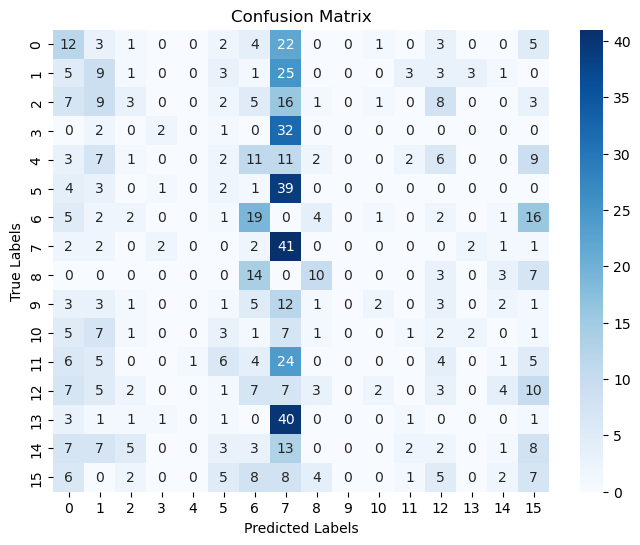

In [73]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.2264, FPR = 0.0884, TNR = 0.9116, FNR = 0.7736
Class 1: TPR = 0.1667, FPR = 0.0787, TNR = 0.9213, FNR = 0.8333
Class 2: TPR = 0.0545, FPR = 0.0239, TNR = 0.9761, FNR = 0.9455
Class 3: TPR = 0.0541, FPR = 0.0055, TNR = 0.9945, FNR = 0.9459
Class 4: TPR = 0.0000, FPR = 0.0014, TNR = 0.9986, FNR = 1.0000
Class 5: TPR = 0.0400, FPR = 0.0433, TNR = 0.9567, FNR = 0.9600
Class 6: TPR = 0.3585, FPR = 0.0926, TNR = 0.9074, FNR = 0.6415
Class 7: TPR = 0.7736, FPR = 0.3590, TNR = 0.6410, FNR = 0.2264
Class 8: TPR = 0.2703, FPR = 0.0219, TNR = 0.9781, FNR = 0.7297
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0095, TNR = 0.9905, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0141, TNR = 0.9859, FNR = 1.0000
Class 12: TPR = 0.0588, FPR = 0.0573, TNR = 0.9427, FNR = 0.9412
Class 13: TPR = 0.0000, FPR = 0.0098, TNR = 0.9902, FNR = 1.0000
Class 14: TPR = 0.0196, FPR = 0.0210, TNR = 0.9790, FNR = 0.9804
Class 15: TPR = 0.1458, FPR = 0.093

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


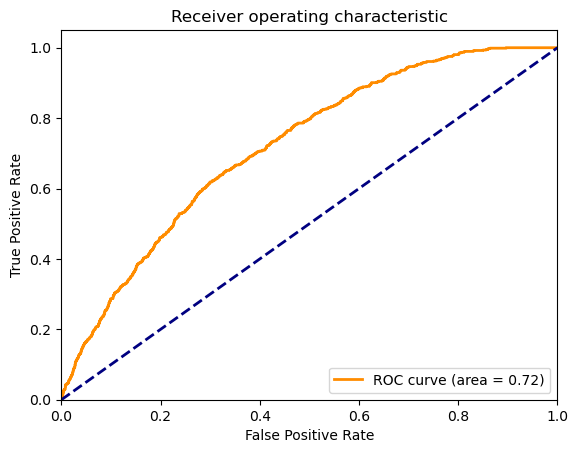

In [75]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 9s 359ms/step - loss: 2.4765 - accuracy: 0.1423
Test Loss: 2.4765214920043945
Test Accuracy: 0.1422976553440094
24/24 [==============================] - 9s 375ms/step
AUC for class 0: 0.6020
AUC for class 1: 0.7305
AUC for class 2: 0.5583
AUC for class 3: 0.9279
AUC for class 4: 0.6954
AUC for class 5: 0.7684
AUC for class 6: 0.8310
AUC for class 7: 0.7717
AUC for class 8: 0.9153
AUC for class 9: 0.5879
AUC for class 10: 0.5820
AUC for class 11: 0.5699
AUC for class 12: 0.7144
AUC for class 13: 0.7689
AUC for class 14: 0.5489
AUC for class 15: 0.6802


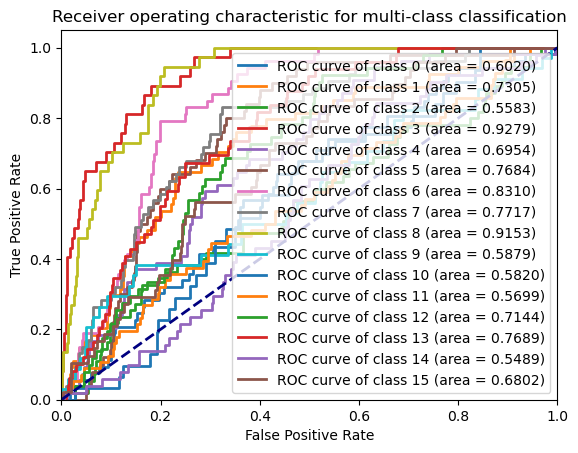

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 35 Epoch

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
44/44 [==============================] - 148s 2s/step - loss: 2.8011 - accuracy: 0.0714 - val_loss: 2.7767 - val_accuracy: 0.0731
Epoch 2/35
44/44 [==============================] - 60s 1s/step - loss: 2.7753 - accuracy: 0.0771 - val_loss: 2.7614 - val_accuracy: 0.0705
Epoch 3/35
44/44 [==============================] - 65s 1s/step - loss: 2.7645 - accuracy: 0.0714 - val_loss: 2.7605 - val_accuracy: 0.0783
Epoch 4/35
44/44 [==============================] - 67s 2s/step - loss: 2.7606 - accuracy: 0.0764 - val_loss: 2.7560 - val_accuracy: 0.0862
Epoch 5/35
44/44 [==============================] - 71s 2s/step - loss: 2.7526 - accuracy: 0.0778 - val_loss: 2.7579 - val_accuracy: 0.0809
Epoch 6/35
44/44 [==============================] - 74s 2s/step - loss: 2.7464 - accuracy: 0.0885 - val_loss: 2.7512 - val_accuracy: 0.0849
Epoch 7/35
44/44 [==============================] - 52s 1s/step - loss: 2.7375 - accuracy: 0.0864 - val_loss: 2.7536 - val_accuracy: 0.0757
Epoch 8/35
44/44 [=

In [78]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 11s 410ms/step - loss: 2.4228 - accuracy: 0.1645
Test Loss: 2.422761917114258
Test Accuracy: 0.16449086368083954
24/24 [==============================] - 23s 453ms/step


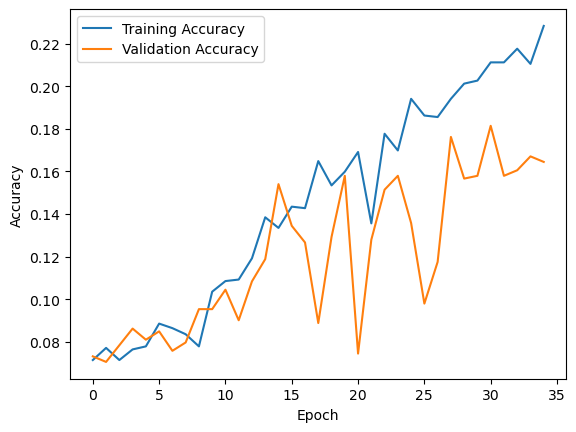

In [79]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

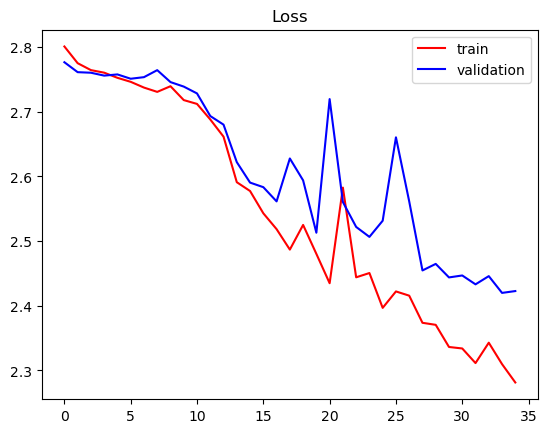

In [80]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [81]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 11s 389ms/step
Confusion Matrix:
[[ 2  6 11  5  8  3  1  5  1  0  1  3  1  3  1  2]
 [ 0 13  5 12  3  1  1  2  0  0  3  1  1 12  0  0]
 [ 1 10 17  3  7  2  1  1  2  0  2  0  0  2  2  5]
 [ 0  1  0 28  0  1  0  5  0  0  0  0  0  2  0  0]
 [ 1  4  9  1 14  3  3  1  4  0  0  0  7  1  1  5]
 [ 1 13  6 18  0  4  0  5  0  0  0  0  0  2  0  1]
 [ 1  1  1  0 17  0 10  0  4  0  1  1  5  0  8  4]
 [ 1  2  5 25  0  4  2  7  0  0  1  0  1  4  1  0]
 [ 0  0  0  0  7  0 10  0 11  0  0  0  1  0  3  5]
 [ 1  4 11  0  4  2  2  1  1  0  2  0  1  2  1  2]
 [ 2  5  4  3  6  0  0  1  0  0  0  2  1  4  0  3]
 [ 3  8  8  6  6  4  1  8  1  0  0  2  1  5  1  2]
 [ 0  6  6  0 11  0  4  1  2  0  4  2  5  2  5  3]
 [ 0  1  4 26  0  1  0  6  0  0  1  0  0  9  0  1]
 [ 3 10 11  0  8  3  1  2  0  0  2  2  0  1  0  8]
 [ 1  5 11  0  6  2  6  2  6  0  1  0  2  0  2  4]]


24/24 [==============================] - 10s 367ms/step


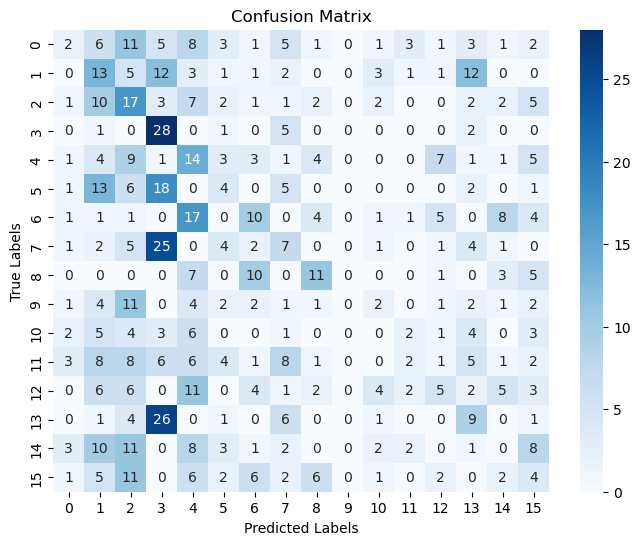

In [82]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0377, FPR = 0.0210, TNR = 0.9790, FNR = 0.9623
Class 1: TPR = 0.2407, FPR = 0.1067, TNR = 0.8933, FNR = 0.7593
Class 2: TPR = 0.3091, FPR = 0.1294, TNR = 0.8706, FNR = 0.6909
Class 3: TPR = 0.7568, FPR = 0.1358, TNR = 0.8642, FNR = 0.2432
Class 4: TPR = 0.2593, FPR = 0.1166, TNR = 0.8834, FNR = 0.7407
Class 5: TPR = 0.0800, FPR = 0.0363, TNR = 0.9637, FNR = 0.9200
Class 6: TPR = 0.1887, FPR = 0.0449, TNR = 0.9551, FNR = 0.8113
Class 7: TPR = 0.1321, FPR = 0.0561, TNR = 0.9439, FNR = 0.8679
Class 8: TPR = 0.2973, FPR = 0.0288, TNR = 0.9712, FNR = 0.7027
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0245, TNR = 0.9755, FNR = 1.0000
Class 11: TPR = 0.0357, FPR = 0.0155, TNR = 0.9845, FNR = 0.9643
Class 12: TPR = 0.0980, FPR = 0.0294, TNR = 0.9706, FNR = 0.9020
Class 13: TPR = 0.1837, FPR = 0.0558, TNR = 0.9442, FNR = 0.8163
Class 14: TPR = 0.0000, FPR = 0.0350, TNR = 0.9650, FNR = 1.0000
Class 15: TPR = 0.0833, FPR = 0.057

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


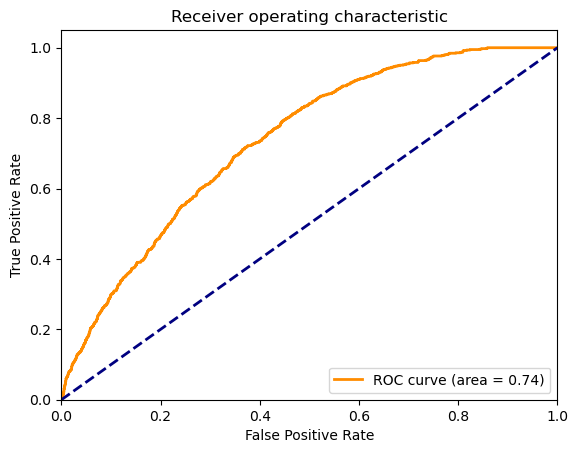

In [84]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 18s 651ms/step - loss: 2.4228 - accuracy: 0.1645
Test Loss: 2.422761917114258
Test Accuracy: 0.16449086368083954
24/24 [==============================] - 16s 585ms/step
AUC for class 0: 0.5877
AUC for class 1: 0.7357
AUC for class 2: 0.6195
AUC for class 3: 0.9377
AUC for class 4: 0.6897
AUC for class 5: 0.7488
AUC for class 6: 0.8352
AUC for class 7: 0.7741
AUC for class 8: 0.9289
AUC for class 9: 0.5831
AUC for class 10: 0.6601
AUC for class 11: 0.6245
AUC for class 12: 0.7203
AUC for class 13: 0.8011
AUC for class 14: 0.5795
AUC for class 15: 0.6811


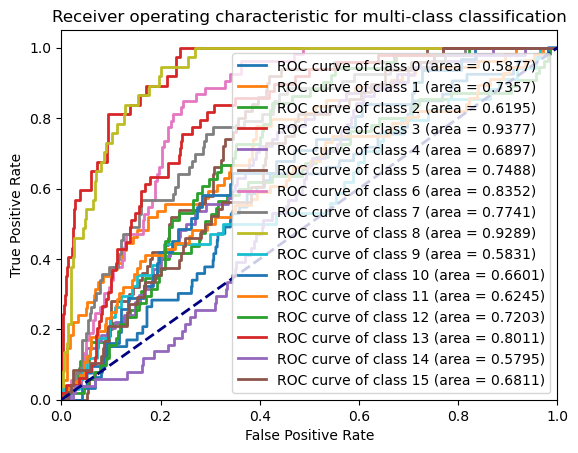

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 40 Epoch

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
44/44 [==============================] - 182s 2s/step - loss: 2.8037 - accuracy: 0.0664 - val_loss: 2.7722 - val_accuracy: 0.0744
Epoch 2/40
44/44 [==============================] - 73s 2s/step - loss: 2.7742 - accuracy: 0.0600 - val_loss: 2.7559 - val_accuracy: 0.0731
Epoch 3/40
44/44 [==============================] - 69s 2s/step - loss: 2.7683 - accuracy: 0.0671 - val_loss: 2.7491 - val_accuracy: 0.0966
Epoch 4/40
44/44 [==============================] - 66s 1s/step - loss: 2.7617 - accuracy: 0.0814 - val_loss: 2.7521 - val_accuracy: 0.0888
Epoch 5/40
44/44 [==============================] - 64s 1s/step - loss: 2.7515 - accuracy: 0.0849 - val_loss: 2.7699 - val_accuracy: 0.0783
Epoch 6/40
44/44 [==============================] - 71s 2s/step - loss: 2.7620 - accuracy: 0.0814 - val_loss: 2.7484 - val_accuracy: 0.0770
Epoch 7/40
44/44 [==============================] - 72s 2s/step - loss: 2.7518 - accuracy: 0.0807 - val_loss: 2.7519 - val_accuracy: 0.0796
Epoch 8/40
44/44 [=

In [87]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 16s 600ms/step - loss: 2.4387 - accuracy: 0.1593
Test Loss: 2.4387106895446777
Test Accuracy: 0.15926893055438995
24/24 [==============================] - 28s 600ms/step


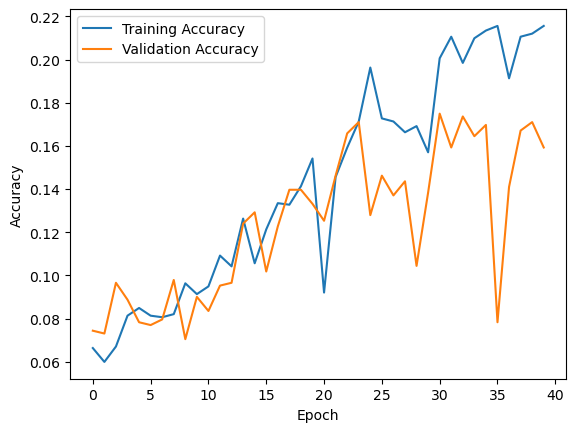

In [88]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

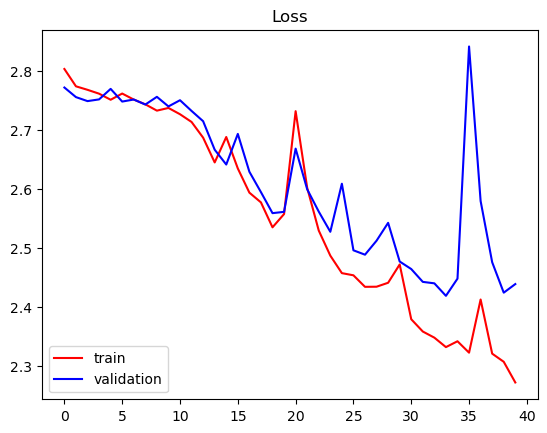

In [89]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [90]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 16s 599ms/step
Confusion Matrix:
[[ 1 16  0  1  1  0  3 10  0  0  3 10  0  1  2  5]
 [ 0 38  0  4  0  0  1  4  0  0  2  1  0  2  0  2]
 [ 3 21  1  0  3  1  1  5  2  0  2  9  1  0  2  4]
 [ 0  7  0 23  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0 14  1  1  4  0 14  2  1  0  1  6  1  0  3  6]
 [ 1 21  0 13  0  0  0 11  0  0  1  2  0  0  0  1]
 [ 0  3  0  0  7  0 15  0  4  0  0  4  0  0  2 18]
 [ 1 12  0 19  0  1  2 14  0  0  0  3  0  0  1  0]
 [ 0  2  0  0  2  0 15  0  8  1  0  0  0  0  3  6]
 [ 0 18  1  0  0  0  4  3  0  0  1  3  1  0  1  2]
 [ 0 15  1  2  1  0  0  3  1  0  1  4  0  0  1  2]
 [ 2 20  2  3  2  0  4 12  0  0  0  4  2  1  1  3]
 [ 1 14  0  0  2  0  8  1  1  0  4  6  2  0  1 11]
 [ 0 16  0 19  0  1  0 10  0  0  0  2  0  0  0  1]
 [ 1 16  0  0  0  0  3  8  0  0  0  9  1  0  3 10]
 [ 3  7  1  0  0  0 10  4  2  0  2  6  1  0  4  8]]


24/24 [==============================] - 17s 587ms/step


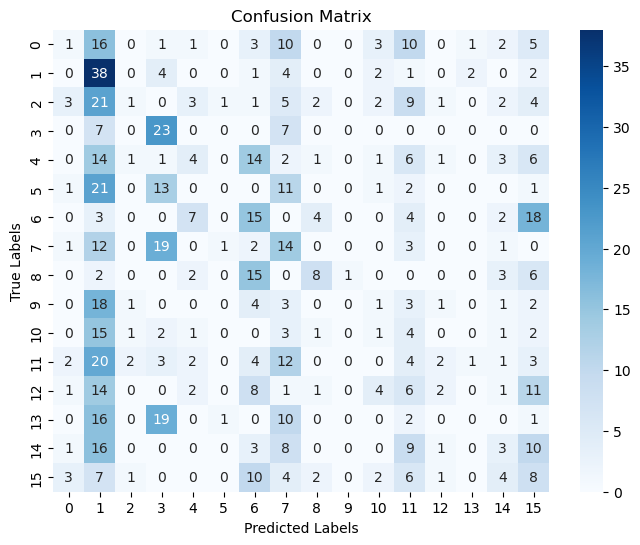

In [91]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0189, FPR = 0.0168, TNR = 0.9832, FNR = 0.9811
Class 1: TPR = 0.7037, FPR = 0.2837, TNR = 0.7163, FNR = 0.2963
Class 2: TPR = 0.0182, FPR = 0.0084, TNR = 0.9916, FNR = 0.9818
Class 3: TPR = 0.6216, FPR = 0.0850, TNR = 0.9150, FNR = 0.3784
Class 4: TPR = 0.0741, FPR = 0.0253, TNR = 0.9747, FNR = 0.9259
Class 5: TPR = 0.0000, FPR = 0.0042, TNR = 0.9958, FNR = 1.0000
Class 6: TPR = 0.2830, FPR = 0.0912, TNR = 0.9088, FNR = 0.7170
Class 7: TPR = 0.2642, FPR = 0.1122, TNR = 0.8878, FNR = 0.7358
Class 8: TPR = 0.2162, FPR = 0.0151, TNR = 0.9849, FNR = 0.7838
Class 9: TPR = 0.0000, FPR = 0.0014, TNR = 0.9986, FNR = 1.0000
Class 10: TPR = 0.0323, FPR = 0.0218, TNR = 0.9782, FNR = 0.9677
Class 11: TPR = 0.0714, FPR = 0.0915, TNR = 0.9085, FNR = 0.9286
Class 12: TPR = 0.0392, FPR = 0.0098, TNR = 0.9902, FNR = 0.9608
Class 13: TPR = 0.0000, FPR = 0.0056, TNR = 0.9944, FNR = 1.0000
Class 14: TPR = 0.0588, FPR = 0.0294, TNR = 0.9706, FNR = 0.9412
Class 15: TPR = 0.1667, FPR = 0.098

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


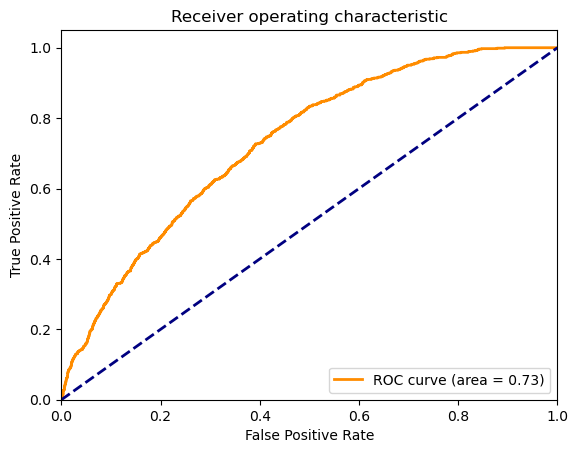

In [93]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 16s 614ms/step - loss: 2.4387 - accuracy: 0.1593
Test Loss: 2.4387106895446777
Test Accuracy: 0.15926893055438995
24/24 [==============================] - 17s 615ms/step
AUC for class 0: 0.5540
AUC for class 1: 0.7745
AUC for class 2: 0.5890
AUC for class 3: 0.9326
AUC for class 4: 0.6894
AUC for class 5: 0.7642
AUC for class 6: 0.8409
AUC for class 7: 0.7941
AUC for class 8: 0.9081
AUC for class 9: 0.5999
AUC for class 10: 0.6288
AUC for class 11: 0.6505
AUC for class 12: 0.7407
AUC for class 13: 0.8001
AUC for class 14: 0.5752
AUC for class 15: 0.6956


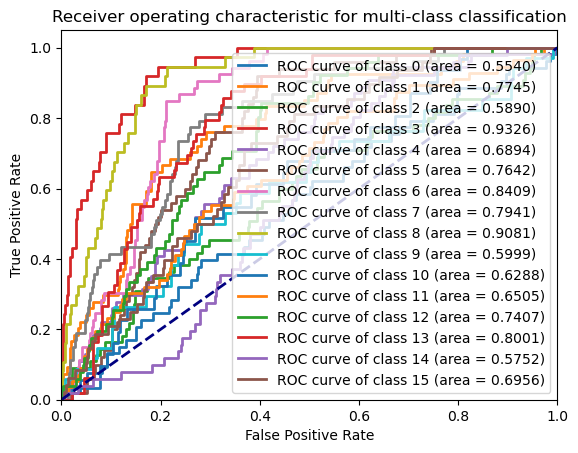

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 80 Epoch

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
44/44 [==============================] - 198s 3s/step - loss: 2.7954 - accuracy: 0.0621 - val_loss: 2.7707 - val_accuracy: 0.0718
Epoch 2/80
44/44 [==============================] - 86s 2s/step - loss: 2.7692 - accuracy: 0.0685 - val_loss: 2.7606 - val_accuracy: 0.0783
Epoch 3/80
44/44 [==============================] - 83s 2s/step - loss: 2.7612 - accuracy: 0.0849 - val_loss: 2.7531 - val_accuracy: 0.0836
Epoch 4/80
44/44 [==============================] - 84s 2s/step - loss: 2.7583 - accuracy: 0.0785 - val_loss: 2.7593 - val_accuracy: 0.0731
Epoch 5/80
44/44 [==============================] - 84s 2s/step - loss: 2.7585 - accuracy: 0.0835 - val_loss: 2.7602 - val_accuracy: 0.0875
Epoch 6/80
44/44 [==============================] - 85s 2s/step - loss: 2.7485 - accuracy: 0.0835 - val_loss: 2.7556 - val_accuracy: 0.0770
Epoch 7/80
44/44 [==============================] - 83s 2s/step - loss: 2.7370 - accuracy: 0.0864 - val_loss: 2.7575 - val_accuracy: 0.0744
Epoch 8/80
44/44 [=

In [96]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 7s 276ms/step - loss: 2.6712 - accuracy: 0.1149
Test Loss: 2.6711678504943848
Test Accuracy: 0.11488250643014908
24/24 [==============================] - 13s 260ms/step


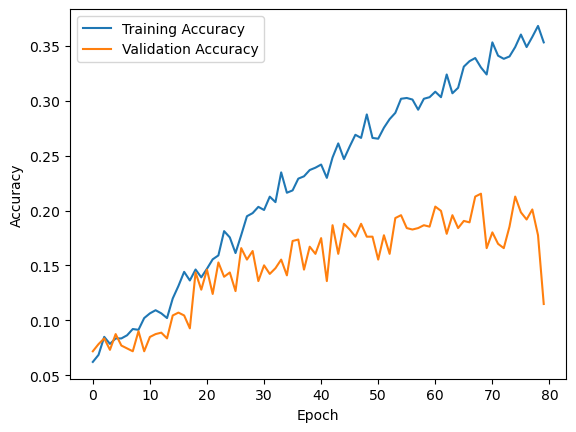

In [97]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

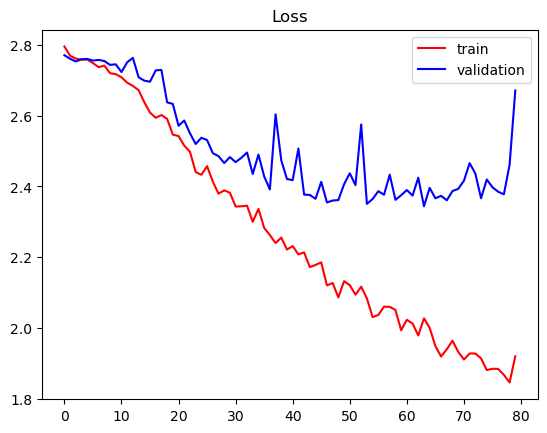

In [98]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [99]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 7s 274ms/step
Confusion Matrix:
[[ 0  4  6  4  0  5  0  8  0  4  2  6  2  7  3  2]
 [ 2  2  1 13  0  2  0  2  0  0  3  2  0 27  0  0]
 [ 7  7  5  4  0  0  0  7  0  1  3  7  0  5  4  5]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  2  9  4  2  2  4  2  1  0  2  5  4  5  8  4]
 [ 0  2  0 29  0  2  0 10  0  0  0  1  0  5  1  0]
 [ 0  1  8  1  1  1  5  1  1  1  4  7  3  0 15  4]
 [ 2  1  0 31  0  1  1  7  0  0  0  1  0  7  1  1]
 [ 0  0  3  0  0  0 13  0  6  1  2  1  1  0  5  5]
 [ 3  1  0  3  1  1  2  3  0  1  5  3  1  8  2  0]
 [ 0  4  5  3  1  2  0  1  0  3  0  1  0  9  2  0]
 [ 1  7  3  7  1  5  1  8  0  2  2  5  1 10  2  1]
 [ 2  3  6  0  0  0  5  5  0  4  1  1  1  5 14  4]
 [ 0  1  0 27  0  1  0  3  0  0  0  0  0 16  0  1]
 [ 3  9  7  1  0  3  1  8  0  0  1 10  0  5  2  1]
 [ 5  1 12  2  0  1  3  3  1  0  1  8  0  2  5  4]]


24/24 [==============================] - 7s 267ms/step


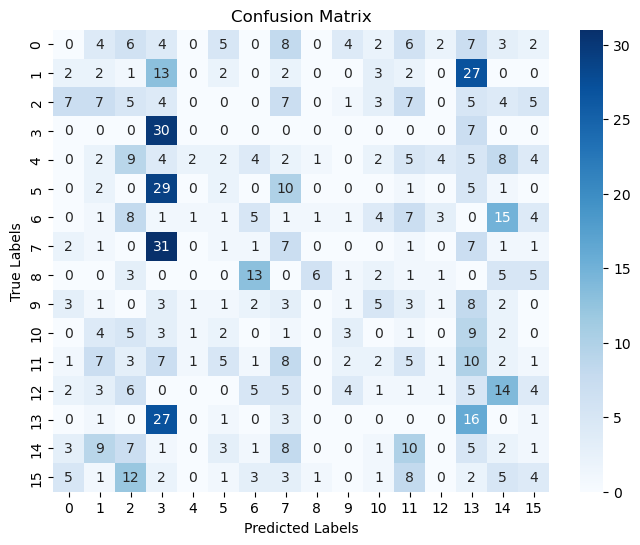

In [100]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [101]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0351, TNR = 0.9649, FNR = 1.0000
Class 1: TPR = 0.0370, FPR = 0.0604, TNR = 0.9396, FNR = 0.9630
Class 2: TPR = 0.0909, FPR = 0.0844, TNR = 0.9156, FNR = 0.9091
Class 3: TPR = 0.8108, FPR = 0.1770, TNR = 0.8230, FNR = 0.1892
Class 4: TPR = 0.0370, FPR = 0.0056, TNR = 0.9944, FNR = 0.9630
Class 5: TPR = 0.0400, FPR = 0.0335, TNR = 0.9665, FNR = 0.9600
Class 6: TPR = 0.0943, FPR = 0.0421, TNR = 0.9579, FNR = 0.9057
Class 7: TPR = 0.1321, FPR = 0.0856, TNR = 0.9144, FNR = 0.8679
Class 8: TPR = 0.1622, FPR = 0.0041, TNR = 0.9959, FNR = 0.8378
Class 9: TPR = 0.0294, FPR = 0.0219, TNR = 0.9781, FNR = 0.9706
Class 10: TPR = 0.0000, FPR = 0.0354, TNR = 0.9646, FNR = 1.0000
Class 11: TPR = 0.0893, FPR = 0.0746, TNR = 0.9254, FNR = 0.9107
Class 12: TPR = 0.0196, FPR = 0.0168, TNR = 0.9832, FNR = 0.9804
Class 13: TPR = 0.3265, FPR = 0.1423, TNR = 0.8577, FNR = 0.6735
Class 14: TPR = 0.0392, FPR = 0.0867, TNR = 0.9133, FNR = 0.9608
Class 15: TPR = 0.0833, FPR = 0.039

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


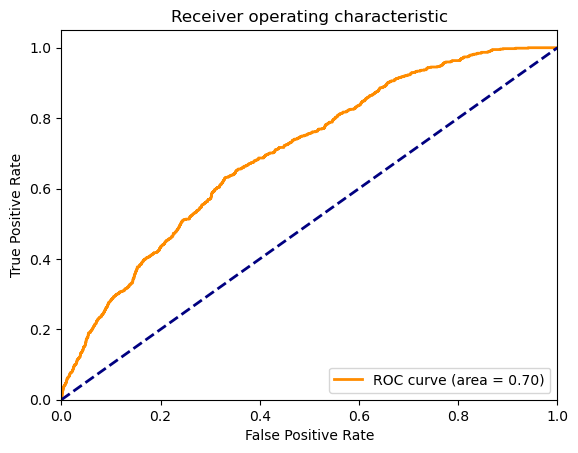

In [102]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 7s 265ms/step - loss: 2.6712 - accuracy: 0.1149
Test Loss: 2.6711678504943848
Test Accuracy: 0.11488250643014908
24/24 [==============================] - 7s 265ms/step
AUC for class 0: 0.6273
AUC for class 1: 0.7969
AUC for class 2: 0.6093
AUC for class 3: 0.9241
AUC for class 4: 0.7246
AUC for class 5: 0.7921
AUC for class 6: 0.8051
AUC for class 7: 0.7943
AUC for class 8: 0.9256
AUC for class 9: 0.6097
AUC for class 10: 0.6493
AUC for class 11: 0.6274
AUC for class 12: 0.7755
AUC for class 13: 0.8127
AUC for class 14: 0.5666
AUC for class 15: 0.7179


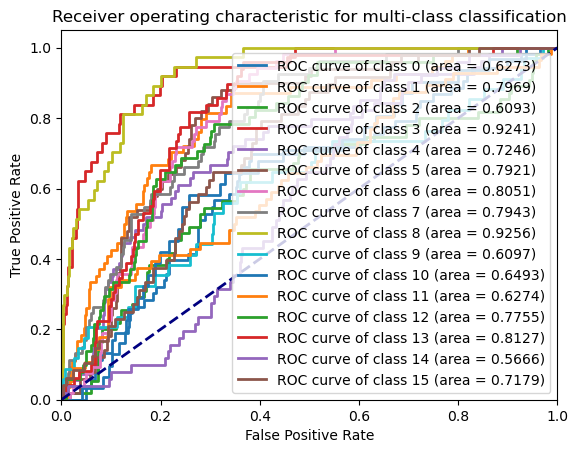

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 200 Epoch

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=200 , batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/200
44/44 [==============================] - 59s 902ms/step - loss: 2.7862 - accuracy: 0.0685 - val_loss: 2.7696 - val_accuracy: 0.0836
Epoch 2/200
44/44 [==============================] - 34s 787ms/step - loss: 2.7729 - accuracy: 0.0707 - val_loss: 2.7532 - val_accuracy: 0.0796
Epoch 3/200
44/44 [==============================] - 35s 798ms/step - loss: 2.7629 - accuracy: 0.0771 - val_loss: 2.7572 - val_accuracy: 0.0888
Epoch 4/200
44/44 [==============================] - 34s 781ms/step - loss: 2.7574 - accuracy: 0.0749 - val_loss: 2.7610 - val_accuracy: 0.0770
Epoch 5/200
44/44 [==============================] - 35s 795ms/step - loss: 2.7603 - accuracy: 0.0742 - val_loss: 2.7530 - val_accuracy: 0.0979
Epoch 6/200
44/44 [==============================] - 34s 776ms/step - loss: 2.7522 - accuracy: 0.0814 - val_loss: 2.7536 - val_accuracy: 0.0901
Epoch 7/200
44/44 [==============================] - 34s 772ms/step - loss: 2.7433 - accuracy: 0.1092 - val_loss: 2.7536 - val_accuracy:

In [105]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

24/24 [==============================] - 6s 236ms/step - loss: 3.1320 - accuracy: 0.2415
Test Loss: 3.131962537765503
Test Accuracy: 0.24151435494422913
24/24 [==============================] - 9s 236ms/step


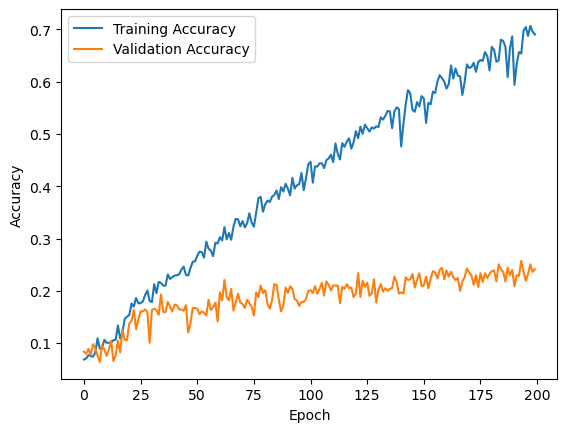

In [106]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

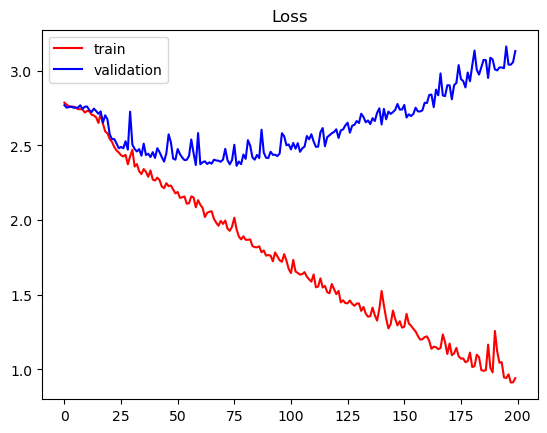

In [107]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [108]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

24/24 [==============================] - 6s 235ms/step
Confusion Matrix:
[[ 3  1  9  2  2  3  5  4  1  1  3  5  3  3  3  5]
 [ 1 16  1  1  1  4  1  1  1  5  0  4  0 15  3  0]
 [ 2  3  9  1  4  2  3  2  0  3  3  8  1  1  7  6]
 [ 0  4  0 19  1  1  0  3  0  0  0  0  0  9  0  0]
 [ 1  2  5  0 12  0  5  0  2  1  1  2 11  2  4  6]
 [ 1  5  2  1  4 15  0  5  0  3  0  1  2 10  1  0]
 [ 2  1  2  0  3  0 12  0  2  1  1  4  7  0  8 10]
 [ 8  2  3  9  1  4  0 11  2  5  0  1  0  5  2  0]
 [ 0  0  1  0  4  0 11  0  9  2  2  1  2  0  1  4]
 [ 1  5  4  0  2  1  1  1  1  3  4  3  1  5  2  0]
 [ 2  4  3  0  3  1  0  1  0  2  0  3  3  6  3  0]
 [ 3  4  4  2  1  4  4  9  1  4  3 10  2  2  3  0]
 [ 0  0  0  0 11  0  3  2  3  2  1  0 19  0  1  9]
 [ 0  4  4  6  0  1  1  2  0  1  0  2  0 28  0  0]
 [ 4  3  5  0  1  3  0  0  1  2  1  2  7  1  8 13]
 [ 1  1  4  0  8  0  5  2  2  0  0  5  5  0  4 11]]


24/24 [==============================] - 6s 243ms/step


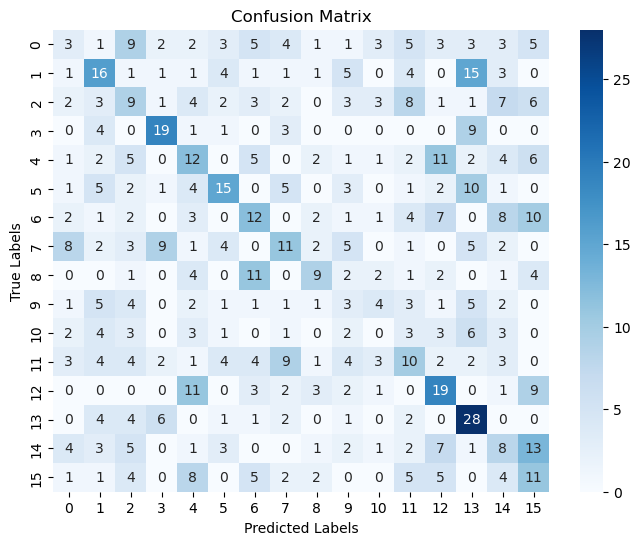

In [109]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [110]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0566, FPR = 0.0365, TNR = 0.9635, FNR = 0.9434
Class 1: TPR = 0.2963, FPR = 0.0548, TNR = 0.9452, FNR = 0.7037
Class 2: TPR = 0.1636, FPR = 0.0661, TNR = 0.9339, FNR = 0.8364
Class 3: TPR = 0.5135, FPR = 0.0302, TNR = 0.9698, FNR = 0.4865
Class 4: TPR = 0.2222, FPR = 0.0646, TNR = 0.9354, FNR = 0.7778
Class 5: TPR = 0.3000, FPR = 0.0335, TNR = 0.9665, FNR = 0.7000
Class 6: TPR = 0.2264, FPR = 0.0547, TNR = 0.9453, FNR = 0.7736
Class 7: TPR = 0.2075, FPR = 0.0449, TNR = 0.9551, FNR = 0.7925
Class 8: TPR = 0.2432, FPR = 0.0219, TNR = 0.9781, FNR = 0.7568
Class 9: TPR = 0.0882, FPR = 0.0437, TNR = 0.9563, FNR = 0.9118
Class 10: TPR = 0.0000, FPR = 0.0259, TNR = 0.9741, FNR = 1.0000
Class 11: TPR = 0.1786, FPR = 0.0577, TNR = 0.9423, FNR = 0.8214
Class 12: TPR = 0.3725, FPR = 0.0615, TNR = 0.9385, FNR = 0.6275
Class 13: TPR = 0.5714, FPR = 0.0823, TNR = 0.9177, FNR = 0.4286
Class 14: TPR = 0.1569, FPR = 0.0587, TNR = 0.9413, FNR = 0.8431
Class 15: TPR = 0.2292, FPR = 0.073

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_264\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


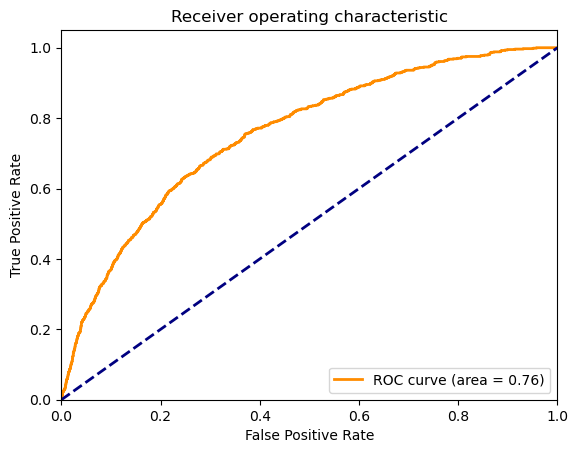

In [111]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 6s 253ms/step - loss: 3.1320 - accuracy: 0.2415
Test Loss: 3.131962537765503
Test Accuracy: 0.24151435494422913
24/24 [==============================] - 6s 253ms/step
AUC for class 0: 0.5530
AUC for class 1: 0.8210
AUC for class 2: 0.5986
AUC for class 3: 0.9294
AUC for class 4: 0.7624
AUC for class 5: 0.7786
AUC for class 6: 0.7665
AUC for class 7: 0.7737
AUC for class 8: 0.8837
AUC for class 9: 0.5963
AUC for class 10: 0.5961
AUC for class 11: 0.6616
AUC for class 12: 0.8726
AUC for class 13: 0.8635
AUC for class 14: 0.6828
AUC for class 15: 0.7280


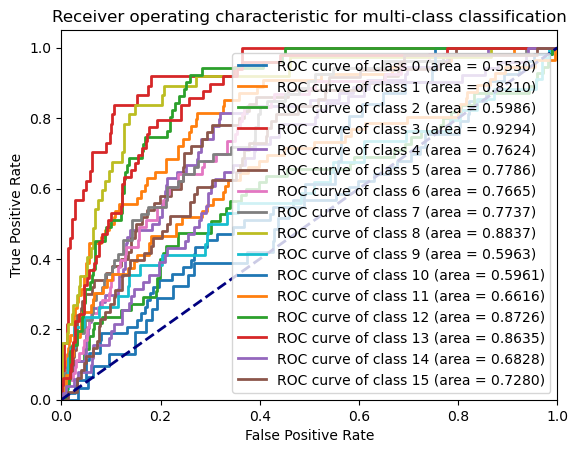

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()